## Primary Component Analysis
We use this notebook to show the reproducibility within each cell type by plotting primary component analysis.

First, we import our loader module. This brings the functions defined there (in our repository at ~/load_data.py) into scope so we can use them in this script. Then we can load our data and store it as <code>data_raw</code>.

In [1]:
import load_data
data_raw = load_data.load_max_quant()

Now we normalize the data.

In [2]:
from numpy import nan
from numpy import log2
from statistics import median

data_log2 = log2(data_raw.replace(0,nan))
data = data_log2.apply(lambda series: series-median(series.dropna()))

Here we call the PCA function from <code>sklearn</code>.

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import math

import numpy as np
import pandas as pd

pca = PCA(n_components=5)

alist=data.values.flatten()
nan_appoximate = float(alist[math.ceil(float(len(alist))*.01)])

pca_result = pca.fit_transform(np.nan_to_num(data.transpose(), nan=nan_appoximate))
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.34293377 0.16484389 0.09198911 0.08677846 0.07900545]


Here we visualize the data.

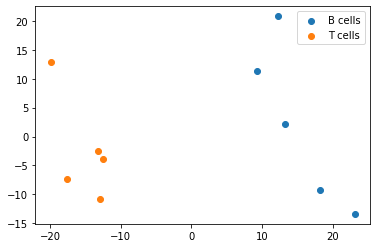

In [6]:
samples=np.array(data.columns.values)
cell_types = ["1_B","1_T"] #Cell types; these strings are in the sample names of those types

for cell_type in cell_types:
    cells_of_type = list(i for i,s in enumerate(samples) if cell_type in s)
    plt.scatter(pca_result[cells_of_type,0],pca_result[cells_of_type,1])
    
plt.legend(['B cells', "T cells"])#, loc='lower center')
plt.show()

The cells group by type.